In [1]:
from resolved_pol import ResolvedPol

In [2]:
object = "W0019-1046"
band = "R_SPECIAL"
mjds = [60201, 60202, "All"]

#Star far from target, only used for seeing but not for position offsets. Assume the ones from W0204-0506.
star_ex_ref = 1145
star_ey_ref = 37.5

#We'll use the source itself for pointing offsets. 
source_ex_ref =  1021.5
source_ey_ref = 70.0

mkdir: stamps: File exists


-0.0 -90.4


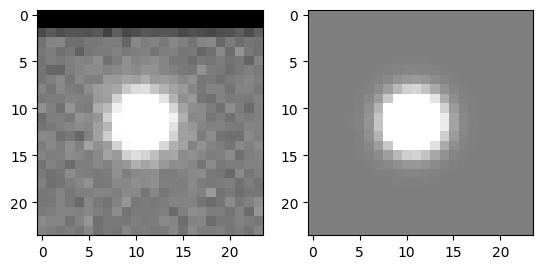

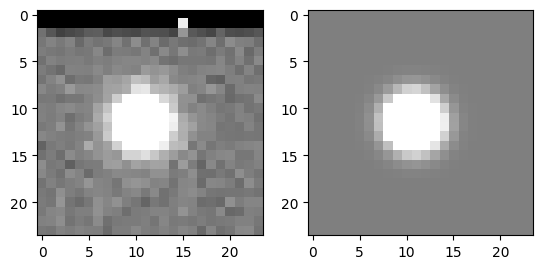

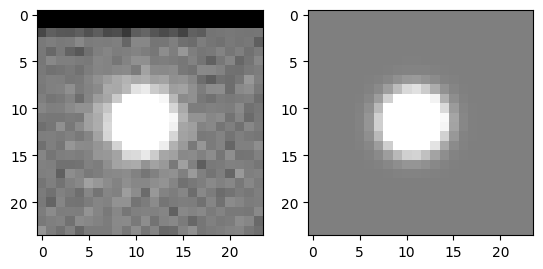

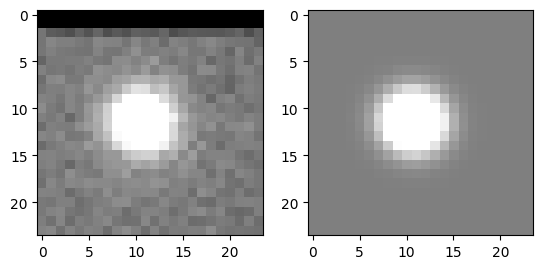

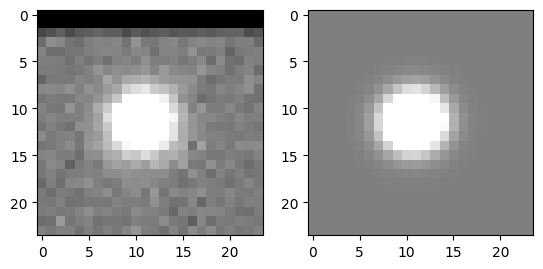

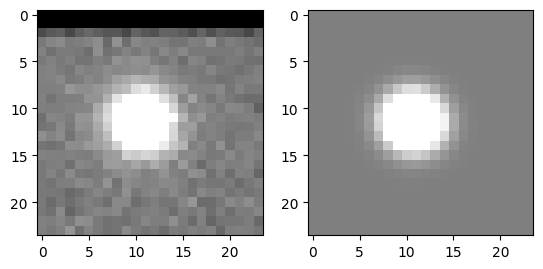

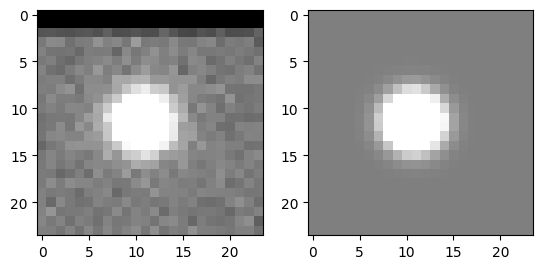

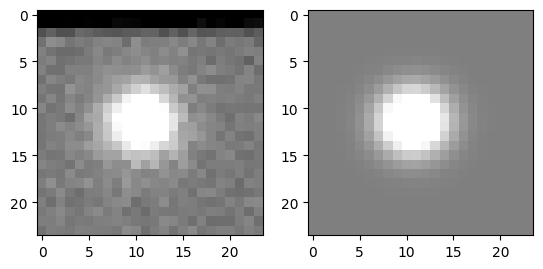

[1.10502189 1.03986245 1.05307247 1.22820506 1.18829702 1.1382902
 1.04663679 1.41808757]
Target FWHM:  1.5
1.709361584958285 0.43075911940948786


1.8217579433678455 0.45908300172869704


1.800080215940266 0.45362021441694705


1.4511119626975695 0.3656802145997875


1.5425911653761073 0.38873297367477905


1.6462021222882506 0.41484293481663914


1.8107078173375268 0.45629836996905676


0.8238834939526942 0.20761864047607895


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/W0204-0506_resolved/resolved_pol.py:216: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)
mkdir: stamps: File exists


-0.1 -90.5


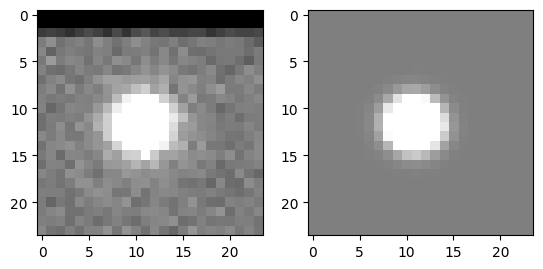

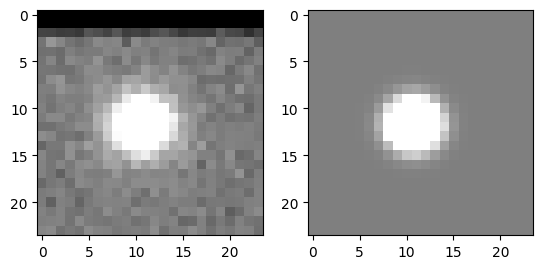

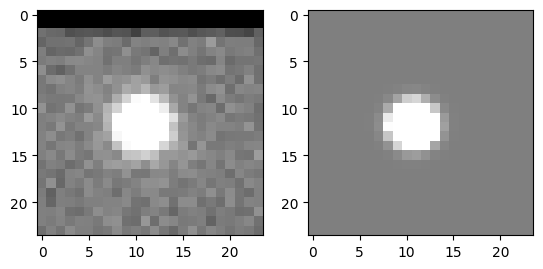

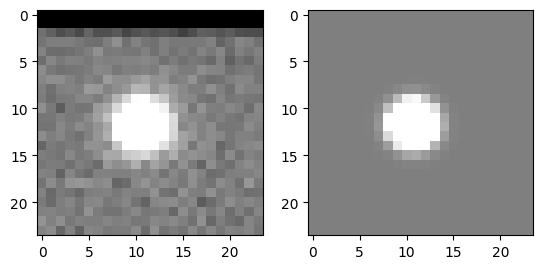

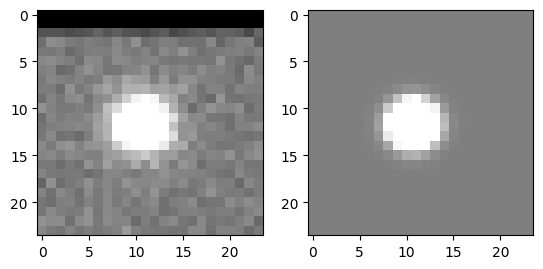

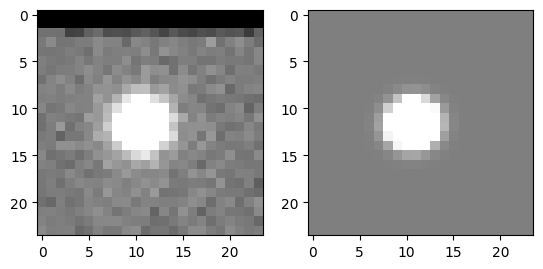

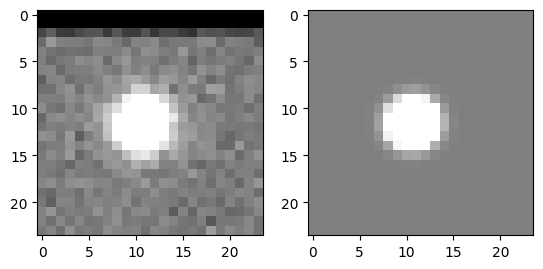

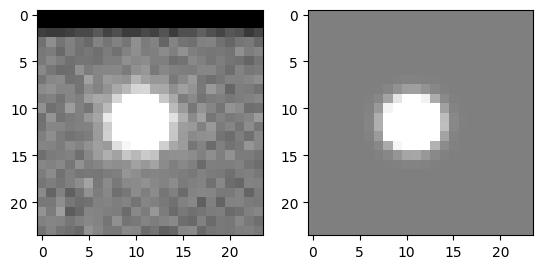

[0.92312543 0.93319412 0.70730909 0.76943956 0.81783517 0.78994311
 0.78451913 0.81739691]
Target FWHM:  1.0
0.64794313974792 0.16328167121647583


0.6056013332300866 0.15261153597398183


1.1912486659634747 0.30019466382279564


1.0763462393905276 0.271239252326413


0.9697309294557214 0.2443721942228418


1.0333080515108926 0.2603936289807449


1.0449769135555316 0.263334182215994


0.9707797072251133 0.24463648622072856


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/W0204-0506_resolved/resolved_pol.py:216: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)
mkdir: stamps: File exists


-0.0 -90.4


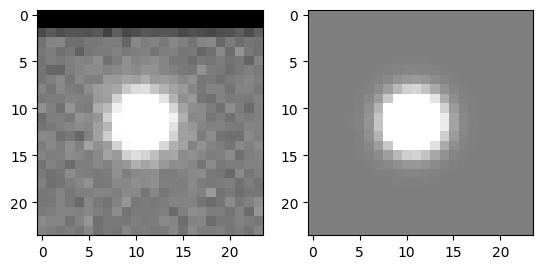

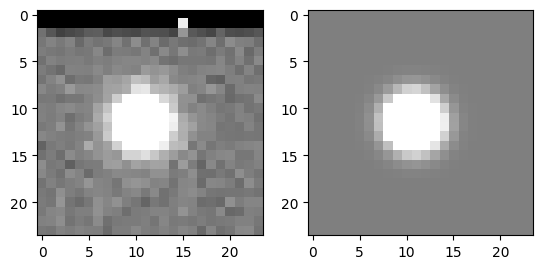

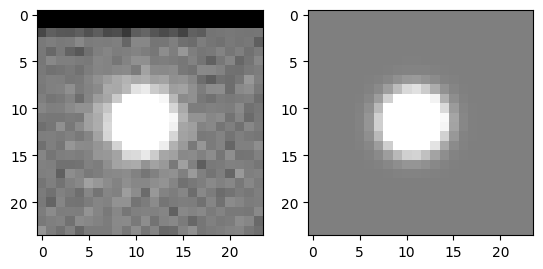

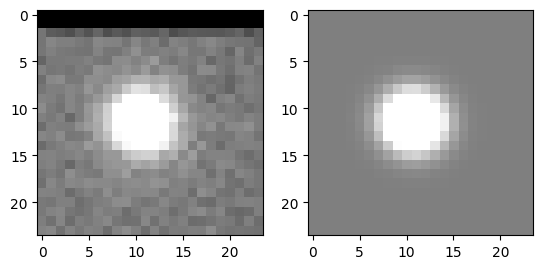

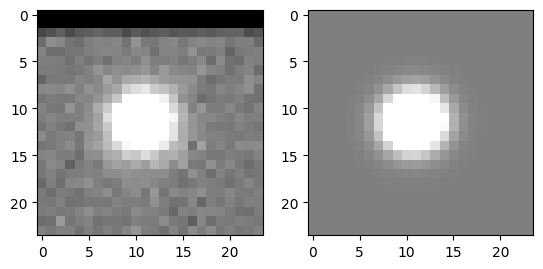

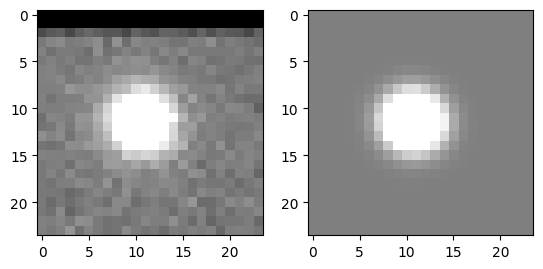

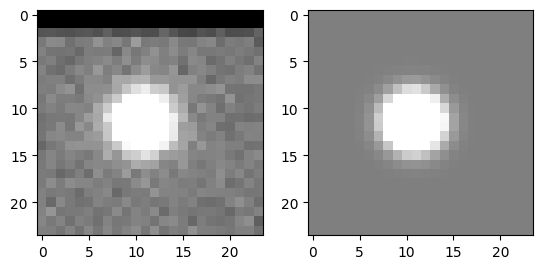

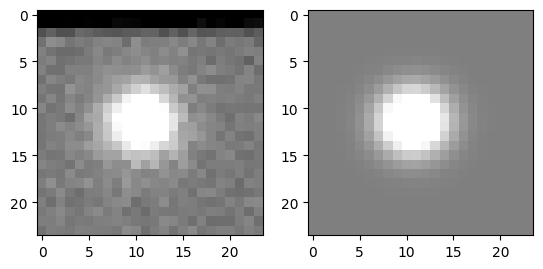

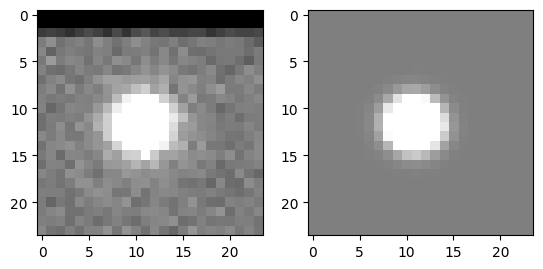

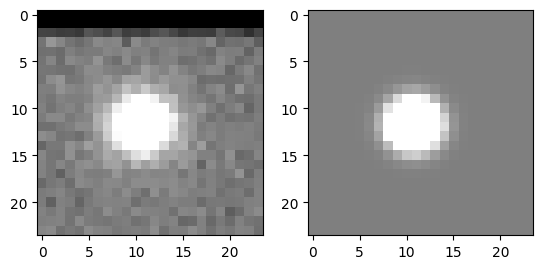

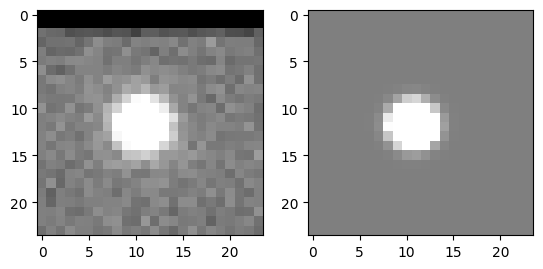

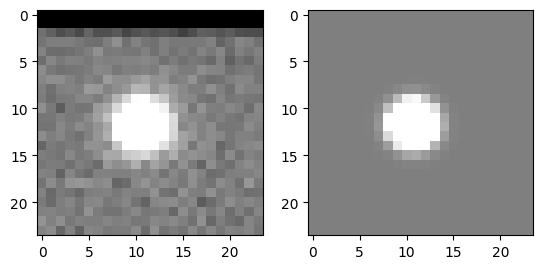

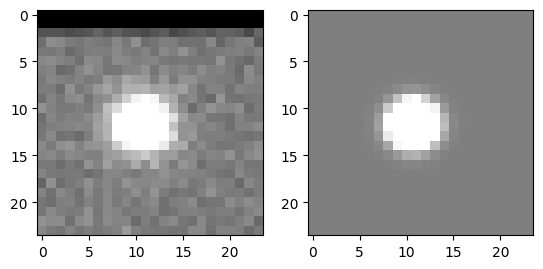

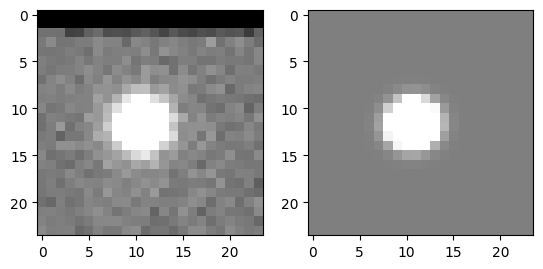

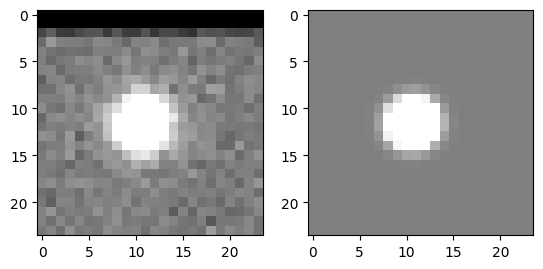

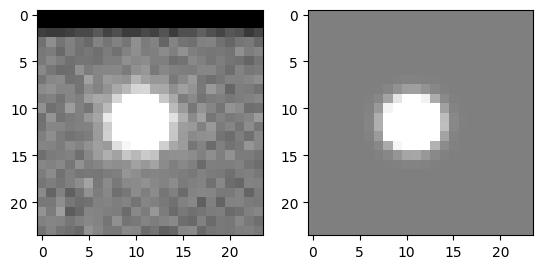

[1.10502189 1.03986245 1.05307247 1.22820506 1.18829702 1.1382902
 1.04663679 1.41808757 0.92312543 0.93319412 0.70730909 0.76943956
 0.81783517 0.78994311 0.78451913 0.81739691]
Target FWHM:  1.5
1.709361584958285 0.43075911940948786


1.8217579433678455 0.45908300172869704


1.800080215940266 0.45362021441694705


1.4511119626975695 0.3656802145997875


1.5425911653761073 0.38873297367477905


1.6462021222882506 0.41484293481663914


1.8107078173375268 0.45629836996905676


0.8238834939526942 0.20761864047607895


1.9923717758284196 0.5020776875087617


1.9790068103928689 0.49870971621900295


2.2290779180932767 0.5617276353595058


2.1698470471029587 0.5468014558699456


2.1189839679229183 0.5339839599165754


2.148823052298289 0.5415034091791688


2.1544585701830847 0.5429235596861374


2.11946413527839 0.5341049620901543


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/W0204-0506_resolved/resolved_pol.py:216: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)


In [3]:
rpos = list()
for mjd in mjds:
    rpo = ResolvedPol(object=object, band=band, mjd=mjd)
    rpo.find_shift(ex_ref=source_ex_ref, ey_ref=source_ey_ref)
    print(rpo.dx_use, rpo.dy_use)

    rpo.find_seeing(ex_ref=star_ex_ref, ey_ref=star_ey_ref, stddev_0=1.5, show_plots=True)
    print(rpo.seeing)

    rpo.get_pol(regularize_psf=True)

    rpos.append(rpo)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval, LinearStretch, ImageNormalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

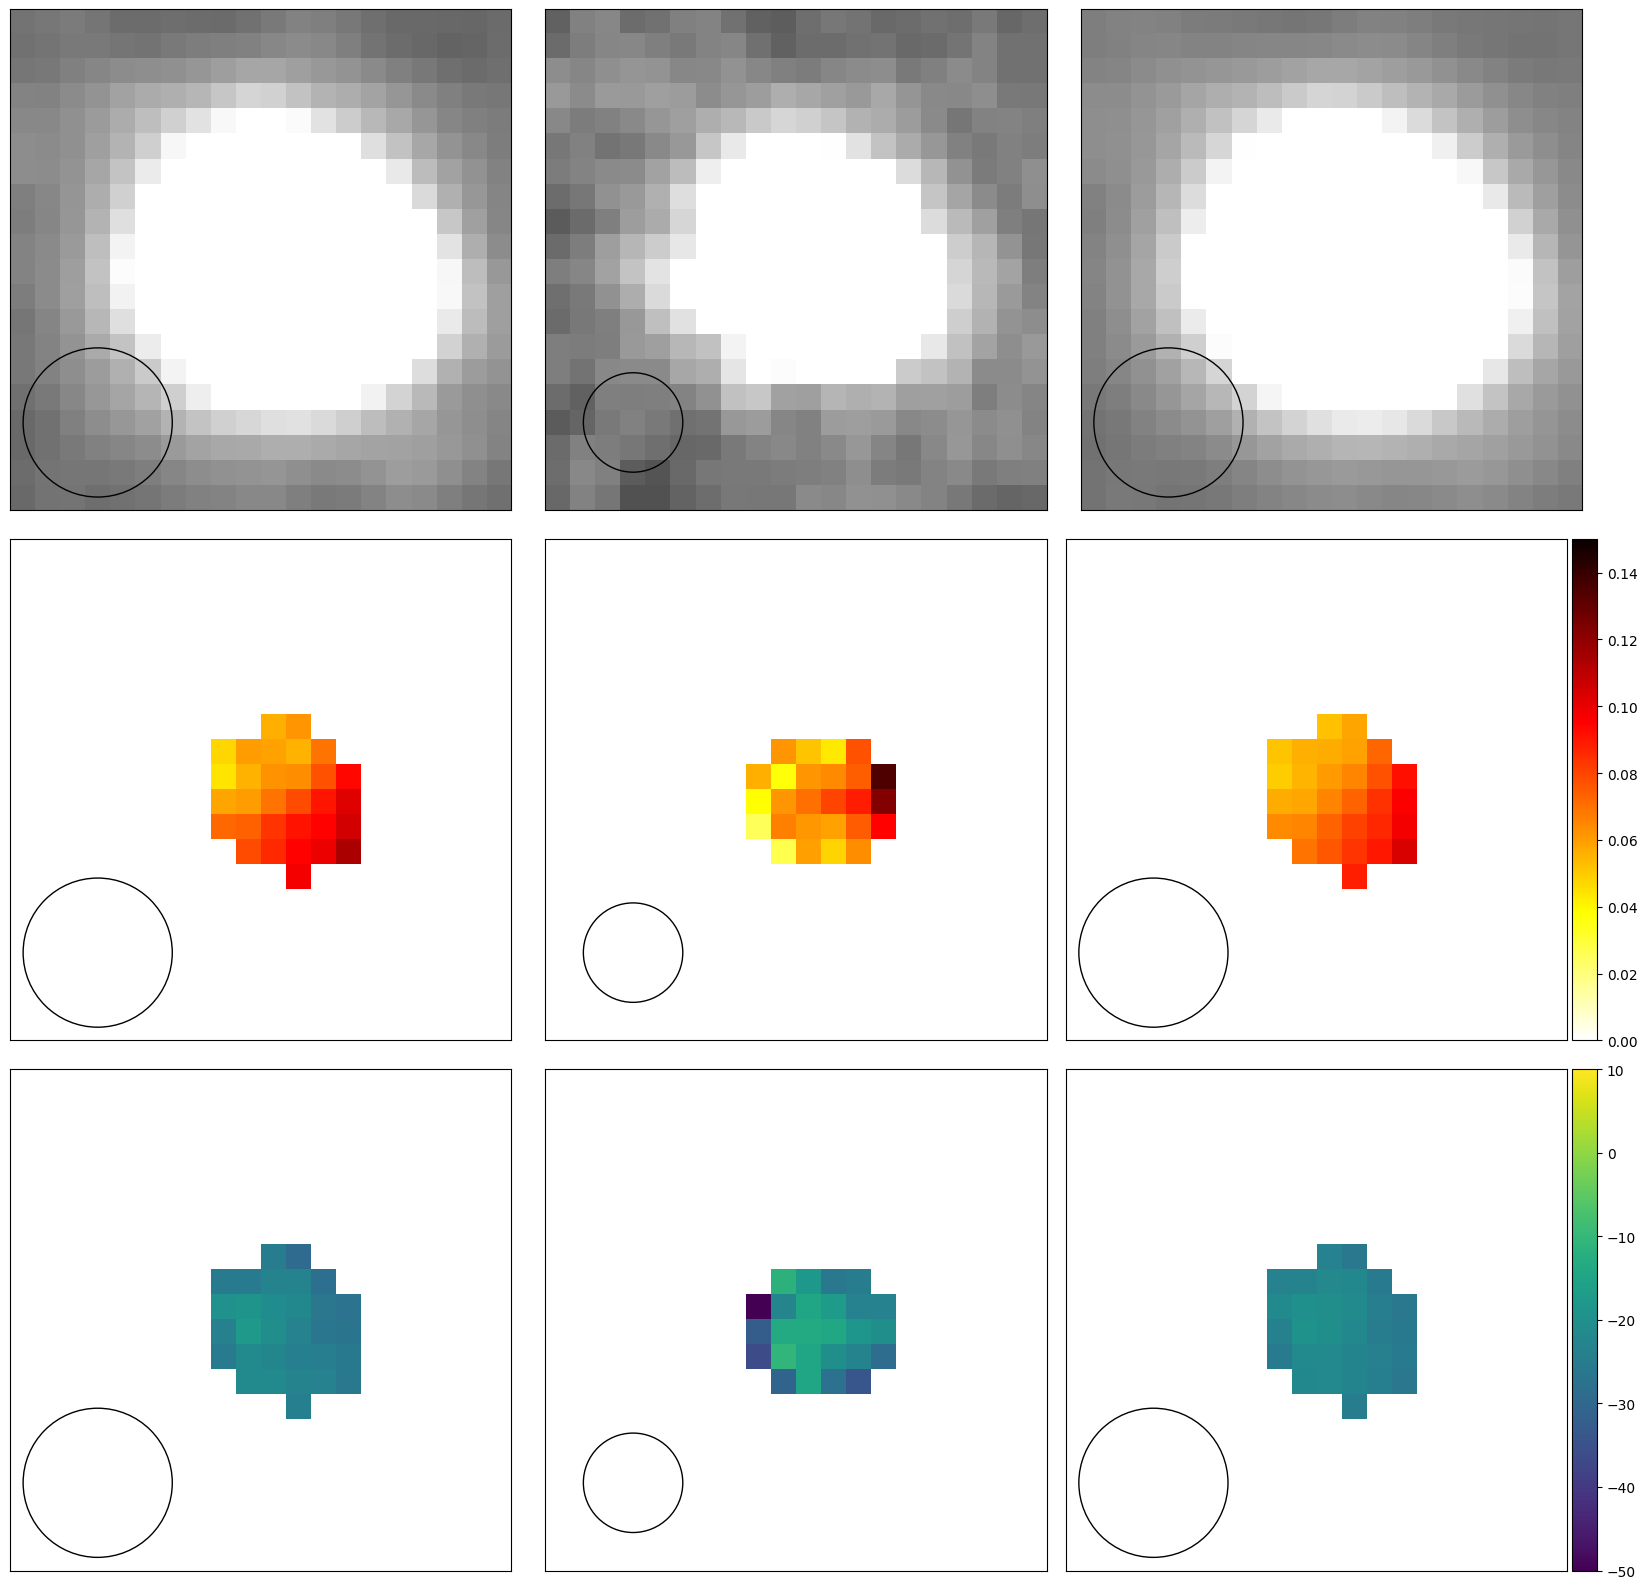

In [5]:
fig, axs = plt.subplots(3,3,figsize=(17,16), sharex=True, sharey=True)
#plt.subplots_adjust(hspace=0., wspace=0.)
plt.subplots_adjust(wspace=0.)
for ax in axs.flat:
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])


stack1 = rpos[0].stack[1]
size = 20
ix1 = int(rpos[0].stack.shape[1]/2 - size/2)
ix2 = int(rpos[0].stack.shape[1]/2 + size/2)
iy1 = int(rpos[0].stack.shape[0]/2 + size/2)
iy2 = int(rpos[0].stack.shape[0]/2 - size/2)
#print(ix1, ix2, iy1, iy2)

norm1 = ImageNormalize(rpos[0].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,0].imshow(rpos[0].stack[iy1:iy2:-1,ix1:ix2], norm=norm1, cmap='gray')

norm2 = ImageNormalize(rpos[1].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,1].imshow(rpos[1].stack[iy1:iy2:-1,ix1:ix2], norm=norm2, cmap='gray')

norm3 = ImageNormalize(rpos[2].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,2].imshow(rpos[2].stack[iy1:iy2:-1,ix1:ix2], norm=norm3, cmap='gray')

axs[1,0].imshow(rpos[0].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0., vmax=0.15)
axs[1,1].imshow(rpos[1].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0., vmax=0.15)
cm_pf = axs[1,2].imshow(rpos[2].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0., vmax=0.15)
divider_pf = make_axes_locatable(axs[1,2])
cax_pf = divider_pf.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm_pf, cax=cax_pf)

axs[2,0].imshow(rpos[0].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-50, vmax=10)
axs[2,1].imshow(rpos[1].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-50, vmax=10)
cm_pa = axs[2,2].imshow(rpos[2].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-50, vmax=10)
divider_pa = make_axes_locatable(axs[2,2])
cax_pa = divider_pa.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm_pa, cax=cax_pa)

for j in range(3):
    for i in range(3):
        beam  = plt.Circle((size*0.15,size*0.8),rpos[i].target_fwhm_pix/2, color='k', fill=False)
        axs[j,i].add_patch(beam)
        
fig.tight_layout()
plt.show()